In [1]:
# useful to have this code snippet to avoid getting an error in case forgeting 
# to close spark

try:
    spark.stop()
except:
    pass

# Using findspark to find automatically the spark folder
!pip install --user findspark
import findspark
findspark.init()

# import python libraries

# initialize
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.types import StringType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
from pyspark.sql import Row

# from pyspark.ml.feature import HashingTF, IDF, RegexTokenizer, StringIndexer, NGram
# from pyspark.ml.classification import LogisticRegression
# from pyspark.ml import Pipeline
# from pyspark.mllib.evaluation import MulticlassMetrics

spark = SparkSession.builder.master("local[*]").getOrCreate()
# num_samples = 100000000

# def inside(p):
#     x, y = random.random(), random.random()
#     return x*x + y*y < 1

# count = spark.sparkContext.parallelize(range(0, num_samples)).filter(inside).count()
# pi = 4 * count / num_samples
# print(pi)

In [2]:
# !pip install --user pandas 
# !pip install --user matplotlib
# !pip install --user fuzzywuzzy
# !pip install --user jellyfish
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from jellyfish import soundex
from jellyfish import levenshtein_distance as ld
import re

In [277]:
with open('../Downloads/cluster2.txt') as fp:
    data = [line for line in fp]
data = " "+data[0][1:-1]
# print(data)
data = data.split(",")
for row in data:
    l = row.split(".")
    print(l[0][2:])
#     if l[1]=='Location_1':
#         print(l[0],l[1])

s3k6-pzi2
mrxb-9w9v
crc3-tcnm
aiww-p3af
jhjm-vsp8
3rfa-3xsf
pqg4-dm6b
mdcw-n682
a5td-mswe
2bnn-yakx
mjux-q9d4
jz4z-kudi
ge8j-uqbf
niy5-4j7q
446w-773i
2sps-j9st
mdcw-n682
52dp-yji6
43nn-pn8j
5fn4-dr26
7yay-m4ae
wcmg-48ep
vw9i-7mzq
3miu-myq2
upwt-zvh3
uqxv-h2se
yjub-udmw
f3cg-u8bv
ahjc-fdu3
a2pm-dj2w
vhah-kvpj
yg5a-hytu
qcdj-rwhu
n3p6-zve2
c284-tqph
pdpg-nn8i
2bnn-yakx
ji82-xba5
kiv2-tbus
q5za-zqz7
fb26-34vu
yahh-6yjc
kiv2-tbus
faiq-9dfq
niy5-4j7q
s3k6-pzi2
m59i-mqex
fzv4-jan3
s9d3-x4fz
jt7v-77mi
cspg-yi7g
vx8i-nprf
qgea-i56i
mjux-q9d4
cspg-yi7g
qusa-igsv
ipu4-2q9a
va74-3m6c
a9md-ynri
n84m-kx4j
8gpu-s594
tg3t-nh4h
mu46-p9is
4s7y-vm5x
3rfa-3xsf
niy5-4j7q
6anw-twe4
weg5-33pj
h9gi-nx95
2bnn-yakx
hy4q-igkk
sxmw-f24h
sqcr-6mww
6rrm-vxj9
d3ge-anaz
cvh6-nmyi
4kpn-sezh
t8hj-ruu2
2sps-j9st
vwxi-2r5k
myei-c3fa
2bmr-jdsv
5mw2-hzqx
uq7m-95z8
pvqr-7yc4
nhms-9u6g
f4rp-2kvy
3btx-p4av
qpm9-j523
bbs3-q5us
erm2-nwe9
72ss-25qh
jz4z-kudi
s27g-2w3u
yayv-apxh
emnd-d8ba
cyfw-hfqk
s79c-jgrm
uzcy-9puk
8k4x-9mp5


In [155]:
# types = [row.split('.')[0] for row in data]
# types[1]

In [261]:
types = [row.split('.')[1] for row in data]
# print(types)

list_to_match = ["person_name", "business_name", "phone_number", "address", "street_name",
"city", "neighborhood", "lat_lon_cord", "zip_code", "borough", "school_name",
"color", "car_make", "city_agency", "area_of_study", "subject_in_school",
"school_level", "college_name", "website", "building_classification",
"vehicle_type", "location_type", "park_playground", "other"]

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

def process(word):
    word = word.strip()
    lsword = word.split('_')
#     print(lsword)
    wr = ""
    for w in lsword:
        if is_number(w):
#             print("It comes",w)
            continue
        wr += w
#     print(lsword)
#     print("This",wr)
#     word = ''.join(ls)
#     word = word.replace('_', "")
#     re.sub('\\d', "", word)
    return wr.lower()


# word = "CORE_COURSE__MS_CORE_and_9_12_ONLY_"
# print(process(word))
temp = []
print("size : ",len(types))
for row in types:
#     print(row)
    newrow = process(row)
    ls = []
    for list_name in list_to_match:
        ls.append( (fuzz.partial_ratio(newrow, list_name.lower()), list_name))
#         print(row, fuzz.partial_ratio(row, list_name))
    ls.sort(reverse=True)
#     print(ls)
    js = {
            "column_name": row,
            "manual_labels": [
                {
                    "semantic_type": ls[0][1]
                }
            ]
        }
    temp.append(js)
#     print(row," is most likely : ", ls[0][1])
print(len(temp))
print(temp)
def checkType(row):
    newrow = process(row)
    ls = []
    for list_name in list_to_match:
        ls.append( (fuzz.partial_ratio(newrow, list_name.lower()), list_name))
    ls.sort(reverse=True)
    return ls[0][1]

size :  272
272
[{'column_name': 'website', 'manual_labels': [{'semantic_type': 'website'}]}, {'column_name': 'BOROUGH___COMMUNITY', 'manual_labels': [{'semantic_type': 'borough'}]}, {'column_name': 'CORE_SUBJECT', 'manual_labels': [{'semantic_type': 'subject_in_school'}]}, {'column_name': 'Location', 'manual_labels': [{'semantic_type': 'location_type'}]}, {'column_name': 'Agency', 'manual_labels': [{'semantic_type': 'city_agency'}]}, {'column_name': 'Incident_Zip', 'manual_labels': [{'semantic_type': 'zip_code'}]}, {'column_name': 'Phone', 'manual_labels': [{'semantic_type': 'phone_number'}]}, {'column_name': 'First_Name', 'manual_labels': [{'semantic_type': 'street_name'}]}, {'column_name': 'Vehicle_Color', 'manual_labels': [{'semantic_type': 'color'}]}, {'column_name': 'Vehicle_Color', 'manual_labels': [{'semantic_type': 'color'}]}, {'column_name': 'SCHOOL_LEVEL_', 'manual_labels': [{'semantic_type': 'school_level'}]}, {'column_name': 'Violation_Location__City_', 'manual_labels': [{

In [157]:
# df = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/.tsv")

In [158]:
# df = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2017_DOE_High_School_Directory.tsv")

In [159]:
# df.select('website').show(df.count(),truncate=False)


In [160]:
# ls = []
# import re

# # def check_website(word):
# # #     grp = re.findall("^((http[s]?|ftp):\/)?\/?([^:\/\s]+)((\/\w+)*\/)([\w\-\.]+[^#?\s]+)(.*)?(#[\w\-]+)?$/", word)
# #     grp = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', str(word))
# #     ls.append(grp)
# #     if grp:
# #         return str(word)
# #     else:
# #         return "0"

# # def create_list(word):
# #     return re.split('; |, |\*|\n|\.|\/',word)
# # #     return word.split('.')

# def process_website(word):
#     if word=='null':
#         return 0
#     ls = re.split('\.|\/',word)
#     lst = ['gov', 'com', 'org', 'info', 'http', 'https', 'net','edu','www']
#     if any(item in ls for item in lst):
#         return 1
#     else:
#         return 0
#     print(ls)
#     return ls
# # def check_boro(word):
# #     if word in ['MANHATTAN', 'staten island', 'BROOKLYN', 'QUEENS', 'BRONX']:
# #         return word
# #     else:
# #         return "0"
# # check_boro = F.udf(check_boro, StringType())

# def check_boro(word):
#     word = str(word)
#     if word=="MANHATTAN":
#         return word
#     elif word=="BROOKLYN":
#         return word
#     elif word=="QUEENS":
#         return word
#     elif word=="BRONX":
#         return word
#     else:
#         return "0"

# #create_list = F.udf(create_list, StringType())
# #check_boro = F.udf(check_boro, StringType())
# #chk = F.udf(check_website, StringType())
# process_website = F.udf(process_website, IntegerType())

In [161]:
# df = df.withColumn('check_website', process_website(F.col('website')))
# df.select('website', 'check_website').show(df.count(), truncate=False)
# cnt_cond = lambda cond: F.sum(F.when(cond, 1).otherwise(0))

# ctr_df = df.groupBy('check_website').agg(
#     cnt_cond(F.col('check_website') == 1).alias('true_count'))
# ctr_df.show()

# l = []
# for row in ctr_df.rdd.collect():
#     l.append((row.check_website, row.true_count))
# print(l)
# print(df.count())

In [162]:
# newdf = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2014_-_2015_DOE_High_School_Directory.tsv")

In [18]:
# For each dataset in the cluster file do:
# find the column name. 
# Call best match for this column name
# call function corresponding to bestMatch on this column
# return the count of non NULL values.

In [163]:
# # newdf.select('website').show(truncate=False)
# # newdf = newdf.na.fill("e", "webiste")
# print(newdf.count())
# newdf = newdf.na.fill("null")
# # newdf.select("website").show(truncate=False)
# newdf = newdf.withColumn('check_website', process_website(F.col('website')))
# # newdf.select('website', 'check_website').show(newdf.count(),truncate=False)
# cnt_cond = lambda cond: F.sum(F.when(cond, 1).otherwise(0))

# ctr_df = newdf.groupBy('check_website').agg(
#     cnt_cond(F.col('check_website') == 1).alias('true_count'))

# l = []
# for row in ctr_df.rdd.collect():
#     l.append((row.check_website, row.true_count))
# print(l)

In [20]:
def generate_json(function, df, col):
    return function(df, col)
with open('../Downloads/cluster2.txt') as fp:
    data = list(fp)
    
data = data[0][1:-1]
data = data.split(",")
for row in data:
    ls = row.split('.')
    fl = ls[0].strip()[1:]
    col = ls[1]
    flname = "/NYCOpenData/"+fl

In [269]:
# # Code for website checking. RUN THIS AND READ A FILE AND CALL json_for_website(dataframe, original_col_name)
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def check_website(word):
#     if word=='null':
#         return "other"
#     ls = re.split('\.|\/',word)
#     lst = ['gov', 'com', 'org', 'info', 'http', 'https', 'net','edu','www']
#     if any(item in ls for item in lst):
#         return "website"
#     else:
#         return "other"

# check_website = F.udf(check_website, StringType())

# def json_for_website(df, col):
#     df = preprocess(df)
#     df = df.withColumn("check", check_website(F.col(col)))
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="0":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}


In [22]:
web1 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2017_DOE_High_School_Directory.tsv")
web2 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2014_-_2015_DOE_High_School_Directory.tsv")
print(json_for_website(web1, "website"))
print(json_for_website(web2, "website"))


{'semantic_type': 'Websites', 'count': [('Other', 1), ('Website', 439)]}
{'semantic_type': 'Websites', 'count': [('Other', 876), ('Website', 429)]}


In [257]:
# # Code for borough checking. RUN THIS AND READ A FILE AND CALL json_for_borough(dataframe, original_col_name)
# def check_borough(word):
#     word = word.lower()
#     if word in ["manhattan", "brooklyn", "bronx", "staten island", "queens"]:
#         return "borough"
#     else:
#         return "other"

# check_borough = F.udf(check_borough, StringType())

# def preprocess(df):
#     df = df.na.fill("null")
#     return df


# def json_for_borough(df, col):
#     df = preprocess(df)
#     df = df.withColumn("check", check_borough(F.col(col)))
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="0":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [25]:
#bor1 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/DYCD_after-school_programs__NDA_Youth_Employment_Programs.tsv")
bor2 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/HIV_Testing_Locations.tsv")

#print(json_for_borough(bor1,"BOROUGH / COMMUNITY"))
print(json_for_borough(bor2, "Borough"))

{'semantic_type': 'Borough', 'count': [('bronx', 143), ('Other', 79), ('manhattan', 156), ('brooklyn', 136), ('queens', 58), ('staten island', 27)]}


In [219]:
wr = "347-881-8075"
wr = wr.replace("-","")
wr

'3478818075'

In [258]:
# # Code for phone checking. RUN THIS AND READ A FILE AND CALL json_for_phone(dataframe, original_col_name)
# def check_phoneNum(number):
#     number = number.strip()
#     number = number.replace("-","")
#     number = number.replace(".","")
#     if number == 'null':
#         return "other"
#     if len(number)!= 10:
#         return "other"
#     if not number.isdigit():
#         return "other"
        
#     return "phone_number"
        
# check_phoneNum = F.udf(check_phoneNum, StringType())
    
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_phone(df, col):
#     df = preprocess(df)
#     df = df.withColumn("check", check_phoneNum(F.col(col)))
#     #df.select(["Phone", "check"]).show(df.count())
#     #print(df.filter(df.Phone == "null").count())
#     #code to display the invalid phone numbers ['N', 'Y', 'null']
#     #dummy = df.filter(df.check == 'Other')
#     #dummy.select("Phone").show(dummy.count())
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [259]:
#'pqg4-dm6b.Phone.txt.gz'
phone = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/NYC_Women_s_Resource_Network_Database.tsv")
print(json_for_phone(phone, "Phone"))

AnalysisException: 'Path does not exist: file:/Users/anjan/Downloads/NYC_Women_s_Resource_Network_Database.tsv;'

In [150]:
# Code for longitude validation
def check_long(number):
    number = number.strip()
    if number == "null":
        return "Other"
    if re.search('[a-zA-Z]', number): #check if any alphabet is present
        return "Other"
    number = float(number)  #convert string to float
    if -180 <= number <= 180: #validation check for longitude
        return "Longitude"
    else:
        return "Other"
    
check_long = F.udf(check_long, StringType())
    
def preprocess(df):
    df = df.na.fill("null")
    return df

def json_for_Long(df, col):
    df = preprocess(df)
    df = df.withColumn("check", check_long(F.col(col)))
    df.createOrReplaceTempView("df")
    temp = spark.sql("select check, count(*) as ctr from df group by check")
    ls = []
    for row in temp.rdd.collect():
        if row.check=="Other":
            ls.append(("Other", row.ctr))
        else:
            ls.append((row.check, row.ctr))
    return {"semantic_type":checkType(col), "count":ls}

In [151]:
#'yjub-udmw.Location__Lat__Long_.txt.gz'
Long = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/NYC_Wi-Fi_Hotspot_Locations.tsv")
print(json_for_Long(Long, "Longitude"))

{'semantic_type': 'Latitude Longitude', 'count': [('Other', 3), ('Longitude', 3318)]}


In [152]:
# Code for latitude validation
def check_lat(number):
    if number == "null":
        return "Other"
    number = number.strip()
    if re.search('[a-zA-Z]', number): #check if any alphabet is present
        return "Other"
    number = float(number)  #convert string to float
    if -90 <= number <= 90: #validation check for longitude
        return "Latitude"
    else:
        return "Other"
    
check_lat = F.udf(check_lat, StringType())
    
def preprocess(df):
    df = df.na.fill("null")
    return df

def json_for_Lat(df, col):
    df = preprocess(df)
    df = df.withColumn("check", check_lat(F.col(col)))
    df.createOrReplaceTempView("df")
    temp = spark.sql("select check, count(*) as ctr from df group by check")
    ls = []
    for row in temp.rdd.collect():
        if row.check=="Other":
            ls.append(("Other", row.ctr))
        else:
            ls.append((row.check, row.ctr))
    return {"semantic_type":checkType(col), "count":ls}

In [153]:
#'yjub-udmw.Location__Lat__Long_.txt.gz'
lat = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/NYC_Wi-Fi_Hotspot_Locations.tsv")
print(json_for_Lat(lat, "Latitude"))

{'semantic_type': 'Latitude Longitude', 'count': [('Other', 3), ('Latitude', 3318)]}


In [177]:
# # Code for zipcode validation
# def check_zipCode(number):
#     number = number.strip()
#     if number == "null":
#         return "Other"
    
#     zip_re = re.compile('^[0-9]{5}(?:-[0-9]{4})?$') #accepts 11209 as well as 11209-1234
#     if not zip_re.match(number):
#         return "Other"
    
#     code = number[:5]
#     if int(code)<10000 or int(code)>19999:
#         return "Other"
#     return "Zipcode"    
    
# check_zipCode = F.udf(check_zipCode, StringType())
    
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_zipCode(df, col):
#     df = preprocess(df)
#     df = df.withColumn("check", check_zipCode(F.col(col)))
#     #dummy = df.filter(df.check == 'Other')
#     #dummy.select("Incident Zip").show(dummy.count())
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [178]:
#'yjub-udmw.Location__Lat__Long_.txt.gz'
zipcode = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/311_Service_Requests_for_2009.tsv")
print(json_for_zipCode(zipcode, "Incident Zip"))

{'semantic_type': 'Zip', 'count': [('Zipcode', 1659146), ('Other', 123987)]}


In [204]:
# # Code for business Name validation
# def check_bizName(name):
#     name = name.strip()
#     if name == "null":
#         return "Other"
#     ls = re.split('\.|\/',name)
#     lst = []
#     if any(item in ls for item in lst):
#         return "Business"
#     else:
#         return "Other"
        
    
# check_bizName = F.udf(check_bizName, StringType())
    
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_bizName(df, col):
#     df = preprocess(df)
#     #df.select("BUSINESS_NAME2").show(100)
#     df = df.withColumn("check", check_bizName(F.col(col)))
#     #dummy = df.filter(df.check == 'Other')
#     #dummy.select("Incident Zip").show(dummy.count())
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [205]:
#'qcdj-rwhu.BUSINESS_NAME2.txt.gz'
bizName = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Sidewalk_Caf__Licenses_and_Applications.tsv")
print(json_for_bizName(bizName, "BUSINESS_NAME2"))

+--------------------+
|      BUSINESS_NAME2|
+--------------------+
|            TOASTIES|
|                null|
|              RAFELE|
|       LE SINGE VERT|
|  PAOLA'S RESTAURANT|
|   LE PAIN QUOTIDIEN|
|       KISH KASH NYC|
|            PASCALOU|
|TIMMY'S BY THE RIVER|
|               MAMAK|
| TEDDY'S BAR & GRILL|
|                null|
|                null|
|                null|
|              PAGANI|
|SOLE BISTRO ITALIANO|
|            THE MILL|
|            ASELLINA|
|    MEDI WINEBAR LLC|
|             LADUREE|
|                null|
|                null|
|   MOCA ASIAN BISTRO|
|          BAREBURGER|
| TAORMINA RESTAURANT|
|                null|
|            LA NONNA|
|            DALTON'S|
|                null|
|                null|
|         LE ZIE 2000|
|                null|
|     BUDDHA TACO BAR|
|       LOCANDA VERDE|
|          GYRO WORLD|
|      PASQUALE JONES|
|          SARABETH'S|
|WOODPECKER BY DAV...|
|                null|
|             GLADY'S|
|    MEL'S 

In [195]:
# # Code for address validation
# def check_address(word):
#     word = word.strip()
#     word = word.lower()
#     if word == "null":
#         return "Other"
#     #TODO: use regex to validate address
#     ls = word.split()
#     lst = ['boulevard', 'parkway', 'east', 'west', 'street', 'avenue', 'lane', 'place' , 'road', 'broadway', 'beach', 'drive']
#     if any(item in ls for item in lst):
#         return "Address"
#     else:
#         return "Other"
        
    
# check_address = F.udf(check_address, StringType())
    
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_address(df, col):
#     df = preprocess(df)
#     df = df.withColumn("check", check_address(F.col(col)))
#     #dummy = df.filter(df.check == 'Other')
#     #dummy.select("Address 1").show(dummy.count())
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [196]:
#'446w-773i.Address_1.txt.gz'
address = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2018_School_Quality_Report_Results_for_PreK.tsv")
print(json_for_address(address, "Address 1"))

+--------------------+
|           Address 1|
+--------------------+
|        Site_Address|
|         1 Peck Slip|
|     202 Sherman Ave|
|580 Crotona Park ...|
|275 Harlem River ...|
| 3030 Godwin Terrace|
|2880 Kingsbridge ...|
|   86-35 235th Court|
|65-10 Dieterle Cr...|
|178-37 146th Terrace|
|300 Richmond Terrace|
|   715 Ocean Terrace|
| 110-51 Guy R Brewer|
|  5566 KINGS HIGHWAY|
|    110 Kosciusko St|
|133 Kings First Walk|
|   105 Kings Highway|
|   412 Kings Highway|
|165 Prospect Park...|
|          4 NY Plaza|
|4 Washington Squa...|
|89-89 Van Wyck Ex...|
|95-15 Horace Hard...|
|1 Jamaica Center ...|
|9825 Horace Hardi...|
|     11515 101st Ave|
|JFK Airport Build...|
|6248 Mt. Olivet C...|
|167-01 Union Turn...|
|178-36 Wexford Te...|
|1000 Richmond Ter...|
|    1298 Woodrow Rad|
| 20 Park Hill Circle|
|1345 Grand Concourse|
|  2169 Blackrock Ave|
|3031 Grand Concourse|
|1925 Grand Concourse|
|785 Crotona Park ...|
|1130 Grand Concourse|
|3101 Kingsbridge ...|
|1125 Grand

In [224]:
# # Code for school level validation
# def check_schLvl(word):
#     word = word.strip()
#     word = word.lower()
#     if word == "null":
#         return "Other"
#     lst = ['elementary', 'middle', 'k-2', 'k-3', 'k-8', 'high school' , 'high school transfer', 'yabc']
#     if word in lst:
#         return word        
#     else:
#         return "Other"
                
# check_schLvl = F.udf(check_schLvl, StringType())
    
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_schLvl(df, col):
#     df = preprocess(df)
#     #df.select("SCHOOL LEVEL*").show(100)
#     df = df.withColumn("check", check_schLvl(F.col(col)))
#     #dummy = df.filter(df.check == 'Other')
#     #dummy.select("SCHOOL LEVEL*").show(dummy.count())
    
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}


In [225]:
#'mjux-q9d4.SCHOOL_LEVEL_.txt.gz'
# schLvl = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2011-2012_School_Progress_Report_-_All_Schools.tsv")
# print(json_for_schLvl(schLvl, "SCHOOL LEVEL*"))

{'semantic_type': 'School Levels', 'count': [('yabc', 22), ('k-2', 11), ('k-8', 170), ('elementary', 626), ('high school transfer', 49), ('middle', 394), ('high school', 444), ('k-3', 27)]}


In [ ]:
# colordata = spark.read.option("sep", ",").option("header", "true").csv("../Downloads/wikipedia_color_names.csv")
# colordata.columns
# # colordata = spark.read.option("sep", "|").option("header", "true").csv("../Downloads/wikipedia_color_names.csv")
# clr = colordata.select("Name").rdd.flatMap(lambda x: x).collect()
# lclr = [c.lower() for c in clr]
# print(lclr)
# print(len(lclr))
# soundclr = [soundex(c) for c in lclr]
# print(len(soundclr))

In [148]:
# # Code for vehicle color validation
# # colordata = spark.read.option("sep", ",").option("header", "true").csv("../Downloads/wikipedia_color_names.csv")
# colordata = spark.read.option("sep", ",").option("header", "true").csv("../Downloads/colors.csv")
# clr = colordata.select("name").rdd.flatMap(lambda x: x).collect()
# lclr = []
# for c in clr:
#     l = c.split(" ")
#     if len(l)>1:
#         for li in l:
#             lclr.append(li.lower())
#     lclr.append(c.lower())
# # lclr = [c.lower() for c in clr]

# soundclr = [soundex(c) for c in lclr]
# def check_color(word, lclr, soundclr):
#     word = word.strip()
#     word = word.lower()
#     if word == "null":
#         return "Other"
#     if word in lclr:
#         return "Color" 
# #     if soundex(word) in soundclr:
# #         return "Color"
#     flag = False
#     for c in soundclr:
#         if ld(soundex(word), c)<=1:
#             flag = True
#     if flag:
#         return "Color"
# #     elif soundex(word) in soundclr:
# #         return "Color"
#     else:
#         return "Other"
                
# # check_color = F.udf(check_color, StringType())
# check_color_l=F.udf(lambda x: check_color(x, lclr, soundclr), StringType())
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_color(df, col):
# #     df = df.limit(100)
#     df = preprocess(df)
#     df = df.withColumn("check", check_color_l(F.col(col)))
#     df.select(col, "check").show(100)
#     #dummy = df.filter(df.check == 'Other')
#     #dummy.select("SCHOOL LEVEL*").show(dummy.count())
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [3]:
#'kiv2-tbus.Vehicle_Color.txt.gz'
color = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Parking_Violations_Issued_-_Fiscal_Year_2017.tsv")
# print(json_for_color(color, "Vehicle Color"))

NameError: name 'json_for_color' is not defined

In [356]:
# # Code for city Validation
# citydf = spark.read.option("sep", "|").option("header", "true").csv("../Downloads/USA/us_cities_states_counties.csv")
# citydf = citydf.filter(citydf["State short"]=="NY")
# mvv = citydf.select("City").rdd.flatMap(lambda x: x).collect()
# lowermvv = [c.lower() for c in mvv]
# def check_city(word, mvv):
#     if word is None:
#         return "Other"
#     word = word.strip()
#     word = word.lower()
#     if word == "null":
#         return "Other"
#     lst = mvv
#     if word in lst:
#         return "City"        
#     else:
#         return "Other"
                
# # check_city = F.udf(check_city, StringType())
# check_city_l=F.udf(lambda x: check_city(x,lowermvv), StringType())
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_city(df, col):
#     df = preprocess(df)
#     df = df.withColumn("check", check_city_l(F.col(col)))
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
# #     temp.show()
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [354]:
# city1 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Charges.tsv")
# city2 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2003_Campaign_Contributions (1).tsv")
# print(json_for_city(city1, "City"))
# print(json_for_city(city2, "City"))

In [355]:
# # Code for building classification
# def check_build_cls(word):
#     if '-' not in word:
#         return "other"
#     if word == "null":
#         return "other"
#     word = word.strip().split("-")[0]
#     word = word.upper()
#     lst = ["A0","A1","A2","A3","A4","A5","A6","A7","A8","A9",
#            "B1","B2","B3","B9","C0","C1","C2","C3","C4","C5","C6","C7","C8","C9","CM",
#            "D0","D1","D2","D3","D4","D5","D6","D7","D8","D9",
#            "E1","E2","E3","E4","E7","E9","F1","F2","F4","F5","F8","F9",
#            "G0","G1","G2","G3","G4","G5","G6","G7","G8","G9","GU","GW","G9",
#            "HB","HH","HR","HS","H1","H2","H3","H4","H5","H6","H7","H8","H9",
#            "I1","I2","I3","I4","I5","I6","I7","I9","J1","J2","J3","J4","J5","J6","J7","J8","J9",
#            "K1","K2","K3","K4","K5","K6","K7","K8","K9","L1","L2","L3","L8","L9",
#            "M1","M2","M3","M4","M9","N1","N2","N3","N4","N9",
#            "O1","O2","O3","O4","O5","O6","O7","O8","O9","P1","P2","P3","P4","P5","P6","P7","P8","P9"
#            ,"Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9",
#            "RA","RB","RG","RH","RK","RP","RR","RS","RT","RW","R0","R1","R2","R3","R4","R5","R6","R7","R8","R9","RR",
#            "S0","S1","S2","S3","S4","S5","S9","T1","T2","T9",
#            "U0","U1","U2","U3","U4","U5","U6","U7","U8","U9","V0","V1","V2","V3","V4","V5","V6","V7","V8","V9",
#            "W1","W2","W3","W4","W5","W6","W7","W8","W9","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9",
#            "Z0","Z1","Z2","Z3","Z4","Z5","Z7","Z8","Z9"]
#     if word in lst:
#         return "building_classification"        
#     else:
#         return "other"
                
# check_build_cls = F.udf(check_build_cls, StringType())
    
# def preprocess(df):
#     df = df.na.fill("null")
#     return df

# def json_for_build_cls(df, col):
#     df = preprocess(df)
#     df = df.withColumn("check", check_build_cls(F.col(col)))
#     df.createOrReplaceTempView("df")
#     temp = spark.sql("select check, count(*) as ctr from df group by check")
#     ls = []
#     for row in temp.rdd.collect():
#         if row.check=="Other":
#             ls.append(("Other", row.ctr))
#         else:
#             ls.append((row.check, row.ctr))
#     return {"semantic_type":checkType(col), "count":ls}

In [353]:
# bd2 = pd.read_csv("../Downloads/DOF__Cooperative_Comparable_Rental_Income___Manhattan__FY_2009_2010.tsv", sep="\t")
# bd2 = bd2["MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Building Classification"]
# schema = StructType([StructField('MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Building Classification', StringType(), False)])
# build2 = spark.createDataFrame(bd2, schema)

In [348]:
# build1 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/DOF__Condominium_comparable_rental_income___Brooklyn_-_FY_2010_2011.tsv")
# build2 = spark.read.option("sep", ",").option("header", "true").csv("../Downloads/csvtemp.csv")
# print(json_for_build_cls(build1, "BROOKLYN CONDOMINIUM PROPERTY Building Classification"))
# print(json_for_build_cls(build2, "MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Building Classification"))
# build2.select("MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Building Classification").show()

In [349]:
# build2.select("MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Boro-Block-Lot").show(truncate=False)
# print(build2.count())
# build2.columns

In [131]:
"""
List of functions written for semantic type : 
1. check_park
2. check_agency
3. check_subject
4. check_street
5. check_address
6. check_schLvl
7. check_website
8. check_build_cls
9. check_zipcode
10. check_school_name
11. check_borough
12. check_phoneNum
13. check_color
14. check_city
15. check_latitude/longitude
16. check_biz
17. check_neigh
18. check_car_make
19. check_area_of_study
20. check_uni_name
21. check_body
22. check_loc
"""



def preprocess(df):
    df = df.na.fill("null")
    return df



# Code for location type check
def check_loc(name):
    name = name.lower()
    name = name.replace("&","")
    name = name.replace("and","")
    name = name.replace("/"," ")
    name = name.replace(".","")
    name= name.replace("-","")
    name = name.strip()
#     name = name.split(" ")
    lst = ["residence","house","bar","club","subway","diner","market","street",
           "store","hospital","grocery","bus"]
    for item in lst:
        if item in name:
            return "location_type"
    return "other"

    
check_loc = F.udf(check_loc, StringType())



# Code for vehicle body Validation
def check_body(name):
    name = name.strip()
    name = name.lower()
    name = name.replace("&","")
    name = name.replace("and","")
    name = name.replace("/"," ")
    name = name.split(" ")
    lst = ["wagon", "truck", "sedan", "bike","bus","pick","taxi",
           "van","cycle","cab","motor","door","moped","conv",
           "garbage","mixer","ambul","passenger","tank","flat","bed","wheel",
           "limo","vehicle","dump","train","delv","subn","dsd","util","refg","trlr","pkup","semi"]
    for n in name:
        for item in lst:
            if ld(n, item)<=2:
                return "vehicle_type"
    return "other"

    
check_body = F.udf(check_body, StringType())


# Code for university name Validation
def check_uni_name(name):
    name = name.strip()
    name = name.lower()
    name = name.replace(","," ")
    name = name.replace("&","")
    if name=="null":
        return "other"
    if "university" in name:
        return "college_name"
    if "college" in name and "school" not in name:
        return "college_name"
    return "other"


check_uni_name = F.udf(check_uni_name, StringType())

# Code for area of study validation
def check_area_of_study(name):
    if name=="null" or name=="-":
        return "other"
    name = name.strip()
    name = name.lower()
    name = name.replace("&","")
    name = name.replace("and","")
    name = name.replace("/"," ")
    name = name.split(" ")
    lst = ['general agriculture', 'agriculture production and management', 'agricultural economics', 'animal sciences', 'food science', 'plant science and agronomy', 'soil science', 'miscellaneous agriculture', 'forestry', 'natural resources management', 'fine arts', 'drama and theater arts', 'music', 'visual and performing arts', 'commercial art and graphic design', 'film video and photographic arts', 'studio arts', 'miscellaneous fine arts', 'environmental science', 'biology', 'biochemical sciences', 'botany', 'molecular biology', 'ecology', 'genetics', 'microbiology', 'pharmacology', 'physiology', 'zoology', 'neuroscience', 'miscellaneous biology', 'cognitive science and biopsychology', 'general business', 'accounting', 'actuarial science', 'business management and administration', 'operations logistics and e-commerce', 'business economics', 'marketing and marketing research', 'finance', 'human resources and personnel management', 'international business', 'hospitality management', 'management information systems and statistics', 'miscellaneous business & medical administration', 'communications', 'journalism', 'mass media', 'advertising and public relations', 'communication technologies', 'computer and information systems', 'computer programming and data processing', 'computer science', 'information sciences', 'computer administration management and security', 'computer networking and telecommunications', 'mathematics', 'applied mathematics', 'statistics and decision science', 'mathematics and computer science', 'general education', 'educational administration and supervision', 'school student counseling', 'elementary education', 'mathematics teacher education', 'physical and health education teaching', 'early childhood education', 'science and computer teacher education', 'secondary teacher education', 'special needs education', 'social science or history teacher education', 'teacher education: multiple levels', 'language and drama education', 'art and music education', 'miscellaneous education', 'library science', 'architecture', 'general engineering', 'aerospace engineering', 'biological engineering', 'architectural engineering', 'biomedical engineering', 'chemical engineering', 'civil engineering', 'computer engineering', 'electrical engineering', 'engineering mechanics physics and science', 'environmental engineering', 'geological and geophysical engineering', 'industrial and manufacturing engineering', 'materials engineering and materials science', 'mechanical engineering', 'metallurgical engineering', 'mining and mineral engineering', 'naval architecture and marine engineering', 'nuclear engineering', 'petroleum engineering', 'miscellaneous engineering', 'engineering technologies', 'engineering and industrial management', 'electrical engineering technology', 'industrial production technologies', 'mechanical engineering related technologies', 'miscellaneous engineering technologies', 'materials science', 'nutrition sciences', 'general medical and health services', 'communication disorders sciences and services', 'health and medical administrative services', 'medical assisting services', 'medical technologies technicians', 'health and medical preparatory programs', 'nursing', 'pharmacy pharmaceutical sciences and administration', 'treatment therapy professions', 'community and public health', 'miscellaneous health medical professions', 'area ethnic and civilization studies', 'linguistics and comparative language and literature', 'french german latin and other common foreign language studies', 'other foreign languages', 'english language and literature', 'composition and rhetoric', 'liberal arts', 'humanities', 'intercultural and international studies', 'philosophy and religious studies', 'theology and religious vocations', 'anthropology and archeology', 'art history and criticism', 'history', 'united states history', 'cosmetology services and culinary arts', 'family and consumer sciences', 'military technologies', 'physical fitness parks recreation and leisure', 'construction services', 'electrical', 'industrial arts & consumer services', 'transportation sciences and technologies', 'multi/interdisciplinary studies', 'court reporting', 'pre-law and legal studies', 'criminal justice and fire protection', 'public administration', 'public policy', 'physical sciences', 'astronomy and astrophysics', 'atmospheric sciences and meteorology', 'chemistry', 'geology and earth science', 'geosciences', 'oceanography', 'physics', 'multi-disciplinary or general science', 'nuclear', 'physical sciences', 'psychology', 'educational psychology', 'clinical psychology', 'counseling psychology', 'industrial and organizational psychology', 'social psychology', 'miscellaneous psychology', 'human services and community organization', 'social work', 'interdisciplinary social sciences', 'general social sciences', 'economics', 'criminology', 'geography', 'international relations', 'political science and government', 'sociology', 'miscellaneous social sciences']
    for nm in name:
        for item in lst:
            if nm == item:
                return "area_of_study"
    return "other"

    
check_area_of_study = F.udf(check_area_of_study, StringType())


# Code for car make validation
def check_car_make(name):
    name = name.strip()
    name = name.lower()
    name = name.replace("`","")
    name = name.replace("."," ")
    name = name.replace("0","0")
    lst = ["volvo","chrylsr","datsun","chevy","chevrolet","ford","volkswagen",
           "vw","buick","mercury","dodge","subaru","mazda","audi","honda","hyundai",
           "plymth","lincoln","toyota","renault","peugot","nissan","isuzu","cadillac",
            "yamaha", "jeep","saab","yamaha","porshe","oldsmob","pontac","ferrari","mitsubi",
            "eagle","jaguar","camaro"]
    if name=="-":
        return "other"
    for item in lst:
        if ld(name, item)<=2:
            return "car_make"
    return "other"
    
    if name == "null":
        return "other"
    for item in ls:
        if item in name:
            return "neighborhood"
    return "other"
    
check_make = F.udf(check_car_make, StringType())

# Code for neighborhood validation
def check_neighborhood(name):
    name = name.strip()
    name = name.lower()
    name = name.replace(".","")
    name = name.replace(","," ")
    name = name.split("-")[0]
    
    ls = ['albans','hollis hills', 'jamaica', 'borough park', 'laguardia airport', 
          'stapleton', 'flatiron district', 'stuyvesant town', 'clifton', 
          'westchester square', 'claremont village', 'claremont', 'central park', 
          'emerson hill', 'theater district', 'noho', 'laurelton', 
          'sunnyside', 'clinton hill', 'castle hill', 'ozone park', 
          'highbridge', 'canarsie', 'park slope', 'pelham bay park', 
          'bergen beach', 'upper east side', 'latourette park', 'soundview', 
          'governors island', 'kingsbridge', 'queens village', 'two bridges', 
          "hell's kitchen", 'bloomfield', 'briarwood', 'bay terrace, staten island', 
          'brighton beach', 'douglaston', 'tribeca', 'windsor terrace', 'bronx park', 
          'grymes hill', 'brooklyn heights', 'columbia st', 'concourse', 'ellis island', 
          'ditmars steinway', 'bedford','stuyvesant', 'kew gardens', 'east harlem', 
          'bronxdale', 'bayswater', 'bushwick', 'city island', 'huguenot', 'long island city',
          'new dorp beach', 'richmondtown', 'bellerose', 'east new york', 'maspeth',
          'country club', 'sheepshead bay', 'mariners harbor', 'arlington', 'new brighton',
          'greenwich village', 'westerleigh', 'mill basin', 'spuyten duyvil', 'van nest',
          'washington heights', 'sea gate', 'jamaica estates', 'plum beach', 'morrisania',
          'kips bay', 'tottenville', 'bay ridge', 'east morrisania', 'little neck', 'grant city', 
          'green-wood cemetery', 'west village', 'gerritsen beach', 'soho', 'alley pond park', 
          'lighthouse hill', 'oakwood', 'floral park', 'co-op city', 'cambria heights', 'chinatown', 
          'midtown', 'rockaway beach', 'breezy point', 'howard beach', 'arrochar', 'edenwald', 
          'prospect heights', 'south ozone park', 'marble hill', 'manhattan beach', 'upper west side', 
          'fort wadsworth', 'hunts point', 'roosevelt island', 'port richmond', 'morris heights', 
          'mount eden', 'jamaica bay', 'norwood', 'gramercy', 'fieldston', 'bath beach', 'rosedale', 
          'charleston', 'coney island', 'glendale', 'broad channel', 'cypress hills', 'randall manor', 
          'graniteville', 'west farms', 'civic center', 'concord', 'gowanus', 'mount hope', 'whitestone', 
          'dumbo', 'glen oaks', 'tremont', 'woodside', 'crotona park', 'richmond hill', 'rosebank', 'inwood', 
          'elmhurst', 'far rockaway', 'boerum hill', 'tompkinsville', "bull's head", 'cobble hill', 
          'concourse village', 'morris park', 'van cortlandt park', 'pleasant plains', 'neponsit', 'forest park', 
          'arverne', 'park hill', 'st. george', 'belle harbor', 'eastchester', 'prospect park', 
          'university heights', 'middle village', 'crown heights', 'sunset park', 'chelsea', 'pelham islands', 
          'todt hill', 'flatlands', 'port morris', 'springfield gardens', 'bay terrace', 
          'st. albans', 'dyker heights', 'dongan hills', 'battery park city', 'downtown brooklyn', 
          'howland hook', 'lower east side', 'rikers island', 'ridgewood', 'longwood', 'hart island',
          'pelham bay', 'wakefield', 'jackson heights', 'parkchester', 'pelham gardens', 'little italy', 
          'greenpoint', 'jamaica hills', 'fort greene', 'marine park', 'williamsburg', 'morningside heights', 
          'schuylerville', 'south brother island', 'kew gardens hills', 'midland beach',
          'shore acres', 'corona', 'south beach', 'rossville', 'hoffman island', 'john f. kennedy international airport',
          'midwood', 'east flatbush', 'flatbush', 'brownsville', 'vinegar hill', 'port ivory', 'fort hamilton', 
          'woodlawn', 'college point', 'fordham', 'great kills', 'north riverdale', 'throgs neck', 'mott haven', 
          'rockaway park', 'navy yard', 'liberty island', 'bensonhurst', 'castleton corners', 'great kills park', 
          "prince's bay", 'belmont', 'riverdale', 'willowbrook', "randall's island", 'east village', 'woodhaven', 
          'west brighton', 'chelsea, staten island', 'baychester', 'clason point', 'melrose', 'nolita', 
          'floyd bennett field', 'williamsbridge', 'cunningham park', 'gravesend', 'bayside', 'ferry point park', 
          'silver lake', 'financial district', 'forest hills', 'flushing meadows corona park', 'freshkills park', 
          'olinville', 'kensington', 'woodrow', 'arden heights', 'carroll gardens', 'fresh meadows', 'east elmhurst', 
          'hollis', 'prospect-lefferts gardens', 'south slope', 'rego park', 'unionport', 'eltingville', 'murray hill', 
          'holliswood', 'new dorp', 'new springville', 'red hook', 'allerton', 'harlem', 'flushing', 
          'north brother island', 'astoria', 'edgemere','lincoln square','clinton','manhattan','hunters point',
         'prospect lefferts gardens','Van Cortlandt Village']
    
    
    if name == "null":
        return "other"
    for item in ls:
        if item in name:
            return "neighborhood"
    return "other"
    
check_neigh = F.udf(check_neighborhood, StringType())


# Code for latitude and longitude validation
def check_latLong(number):
    def islat(num):
        if num>=-90 and num<=90:
            return True
        else:
            return False
    
    def islong(num):
        if num>=-180 and num<=180:
            return True
        else:
            return False
    
    number = number.replace('(', '')
    number = number.replace(')', '')
    lst = number.split(',')
    if len(lst)>1:
        try:
            lat = float(lst[0])
            long = float(lst[1])
            if islat(lat) or islong(long):
                return "lat_lon_cord"
            else:
                return "other"
        except:
            return "other"
    else:
        try:
            val = float(lst[0])
            if islat(val) or islong(val):
                return "lat_lon_cord"
            else:
                return "other"
        except:
            return "other"

check_lat_long = F.udf(check_latLong, StringType())


# Code for park Validataion
def check_park(word):
    word = word.strip()
    word = word.lower()
#     word = word.replace("."," ")
#     word = word.replace("-"," ")
#     word = word.replace("/"," ")
#     word = word.replace("("," ")
#     word = word.replace(")"," ")
    ls = word.split(" ")
    lst = ['parks', 'playground', 'gardens','picnic','recs','recreations','zoo', 'rink',
           'square','triangle','plgds','water','front','ferry', 'lake','field', 'center']
    for item in ls:
        for it in lst:
            if ld(item,it)<=1:
                return "park_playground"
    return "other"
        
    
check_park = F.udf(check_park, StringType())

# Code for agency Validation
def check_agency(name):
    name = name.strip()
    name = name.lower()
    lst = ['nycem','nychh','dop','hra','doi','acs','dot','hpd','dca','dpr','ddc','tlc','dcp','dof','doris','cuny','oath','nypd',
           'lpc','dob','qpl','sca','ccrb','dfta','dycd','dcla','nypl','doitt','bic','law','dep','boe','doc','sbs','doe','dohmh',
           'dsny','bpl','dcas','dhs','311','nycha','cchr','fdny','edc','hhc','ocme','oem']
    if name=="null":
        return "other"
    if name in lst:
        return "city_agency"
    else:
        return "other"
    
check_agency = F.udf(check_agency, StringType())

# Code for subject Validation
def check_subject(name):
    name = name.strip()
    name = name.split(" ")
#     name = name.lower()
    ls = [n.lower() for n in name]
    lst = ['math', 'social', 'science', 'english', 'biology', 'history', 'geography', 'algebra', 'economics',
            'chemistry', 'geometry']
    if ls[0]=="null":
        return "other"
    for item in ls:
        for it in lst:
            if ld(item, it) <= 1:
                return "subject_in_school"
    return "other"
            
check_subject = F.udf(check_subject, StringType())            
            
# Code for street validation
def check_street(name):
    if name=="null":
        return "other"
    name = name.strip()
    name = name.split(" ")
    ls = [n.lower() for n in name]
    for item in ls:
        try:
            int(item)
            return "other"
        except:
            continue
    word = ls[-1]
    if word == "null":
        return "other"
    lst = ['boulevard', 'parkway', 'east', 'west', 'street', 'avenue', 'lane', 
           'place' , 'road', 'broadway', 'beach', 'drive', 'trail', 'circle', 'promenade','transit',
            'park', 'highway', 'expressway', 'parkway', 'overpass', 'tunnel', 'slip',
            'bridge', 'exit', 'loop', 'court', 'ramp', 'alley', 'entrance', 'heights', 'oval']
    slst = [soundex(l) for l in lst]
    if any(item in ls for item in lst):
        return "street_name"
    elif any(soundex(item) in ls for item in slst):
        return "street_name"
    else:
        return "other"
    
check_street = F.udf(check_street, StringType())

# Code for address validation
def check_address(word):
    word = word.strip()
    word = word.lower()
    word = word.replace(" ","")
    word = word.replace(",","")
    if word == "null":
        return "other"
    try:
        int(word)
        return "other"
    except:
        None
    if re.match("\d+\w+\d*", word):
        return "address"
    return "other"
        
    
check_address = F.udf(check_address, StringType())


# Code for schoolLevel Validation
def check_schLvl(word):
    word = word.strip()
    word = word.lower()
    if word == "null":
        return "other"
    lst = ['elementary', 'middle', 'k-2', 'k-3', 'k-8', 'high school' , 'high school transfer', 'yabc']
    if word in lst:
        return "school_level"        
    else:
        return "other"
                
check_school_level = F.udf(check_schLvl, StringType())


# Code for website Validation
def check_website(word):
    if word=='null':
        return "other"
    ls = re.split('\.|\/',word)
    lst = ['gov', 'com', 'org', 'info', 'http', 'https', 'net','edu','www']
    if any(item in ls for item in lst):
        return "website"
    else:
        return "other"

check_website = F.udf(check_website, StringType())






# Code for building classification
def check_build_cls(word):
    if '-' not in word:
        return "other"
    if word == "null":
        return "other"
    word = word.strip().split("-")[0]
    word = word.upper()
    lst = ["A0","A1","A2","A3","A4","A5","A6","A7","A8","A9",
           "B1","B2","B3","B9","C0","C1","C2","C3","C4","C5","C6","C7","C8","C9","CM",
           "D0","D1","D2","D3","D4","D5","D6","D7","D8","D9",
           "E1","E2","E3","E4","E7","E9","F1","F2","F4","F5","F8","F9",
           "G0","G1","G2","G3","G4","G5","G6","G7","G8","G9","GU","GW","G9",
           "HB","HH","HR","HS","H1","H2","H3","H4","H5","H6","H7","H8","H9",
           "I1","I2","I3","I4","I5","I6","I7","I9","J1","J2","J3","J4","J5","J6","J7","J8","J9",
           "K1","K2","K3","K4","K5","K6","K7","K8","K9","L1","L2","L3","L8","L9",
           "M1","M2","M3","M4","M9","N1","N2","N3","N4","N9",
           "O1","O2","O3","O4","O5","O6","O7","O8","O9","P1","P2","P3","P4","P5","P6","P7","P8","P9"
           ,"Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9",
           "RA","RB","RG","RH","RK","RP","RR","RS","RT","RW","R0","R1","R2","R3","R4","R5","R6","R7","R8","R9","RR",
           "S0","S1","S2","S3","S4","S5","S9","T1","T2","T9",
           "U0","U1","U2","U3","U4","U5","U6","U7","U8","U9","V0","V1","V2","V3","V4","V5","V6","V7","V8","V9",
           "W1","W2","W3","W4","W5","W6","W7","W8","W9","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9",
           "Z0","Z1","Z2","Z3","Z4","Z5","Z7","Z8","Z9"]
    if word in lst:
        return "building_classification"        
    else:
        return "other"
                
check_build_cls = F.udf(check_build_cls, StringType())


# Code for business Name validation
def check_bizName(name):
    name = name.strip()
    name = name.lower()
    name = name.replace(".","")
    ls = ["co","resto","restaurant","bistro","llc","ltd","inc","pizza","bar",
           "cafe","donuts","grill", "beer","little caesars", "pret","kitchen","hotel","tavern",
            "diner","pllc","group","solutions","pc","pe",'llp','ra']
    ls_new = ["donut","pizz","food","bar","deli","house","bbq","corp","engineer",
              'associate',"architect","consult","service","design","studio"]
    lst = name.split(" ")
    if lst[0]=="the" or lst[0]=='le' or lst[0]=='la':
        return "business_name"
    if name == "null":
        return "other"
    if re.search("\w+\s*[a][n][d]\s*\w+", name):
        return "business_name"
    elif re.search("\s[b][y]\s", name):
        return "business_name"
    elif re.search("\w'[s]", name):
        return "business_name"
    elif any(item in ls for item in lst):
        return "business_name"
    elif any("burger" in item for item in lst):
        return "business_name"
    elif any(it in item for it in ls_new for item in lst):
        return "business_name"
    else:
        return "other"
    
check_biz = F.udf(check_bizName, StringType())



# Code for zipcode validation
def check_zipCode(number):
    number = number.strip()
    if number == "null":
        return "other"
    
    zip_re = re.compile('^[0-9]{5}(?:-[0-9]{4})?$') #accepts 11209 as well as 11209-1234
    if not zip_re.match(number):
        return "other"
    
    code = number[:5]
    if int(code)<10000 or int(code)>19999:
        return "other"
    return "zipcode"    
    
check_zipCode = F.udf(check_zipCode, StringType())


def check_school_name(name):
    name = name.strip()
    name = name.replace(" ","")
    name = name.replace("/","")
    name = name.replace(".","")
    name = name.lower()
    lst = ["ps","i.s","hs","high","school","academy","ms"]
    if any(item in name for item in lst):
        return "school_name"
    else:
        return "other"
    
check_sch_name = F.udf(check_school_name, StringType())



# Code for borough checking. RUN THIS AND READ A FILE AND CALL json_for_borough(dataframe, original_col_name)
def check_borough(word):
    word = word.lower()
    if word in ["manhattan", "brooklyn", "bronx", "staten island", "queens"]:
        return "borough"
    else:
        return "other"

check_borough = F.udf(check_borough, StringType())


# Code for phone checking. RUN THIS AND READ A FILE AND CALL json_for_phone(dataframe, original_col_name)
def check_phoneNum(number):
    number = number.strip()
    number = number.replace("-","")
    number = number.replace(".","")
    if number == 'null':
        return "other"
    if len(number)!= 10:
        return "other"
    if not number.isdigit():
        return "other"
        
    return "phone_number"
        
check_phoneNum = F.udf(check_phoneNum, StringType())

In [ ]:
import json

with open("../Downloads/nyc-neighborhoods/hoods.json") as f:
    data = json.load(f)

lst = []
for item in data["features"]:
    lst.append(item["properties"]["neighborhood"].lower())
print(set(lst))
# def plot_graph_for_json(jsonfilename):
#     with open(jsonfilename) as f:
#         data = json.load(f)
#     dtct = {}
#     for col in data["columns"]:
#         for tp in col["dataTypes"]:
#             dt = tp["type"]
#             if dt not in dtct.keys():
#                 dtct[dt] = 1
#             else:
#                 dtct[dt] += 1
#     filename = jsonfilename.split('.')[0]
#     plt.bar(range(len(dtct)), list(dtct.values()), align='center')
#     st=0
#     for x,y in dtct.items():
#         x=st
#         label = y
#         plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,2),ha='center',weight='bold')
#         st+=1
#     plt.xticks(range(len(dtct)), list(dtct.keys()))
#     plt.title("Histogram for {}".format(filename), weight='bold')
#     plt.show()

In [93]:
# with open("../Downloads/names/male.txt") as f:
#     male = f.readlines()
# with open("../Downloads/names/female.txt") as f:
#     female = f.readlines()
# male = [x.strip() for x in male]
# female = [x.strip() for x in female]
# content = male+female

# def check_name(name, content):
#     if name=="null" or name=="-":
#         return "other"
#     name = name.lower()
#     name = name.replace("&","")
#     name = name.replace("and","")
#     name = name.replace("/"," ")
#     name = name.replace(".","")
#     name= name.replace("-","")
#     name = name.strip()
#     if len(name)==1:
#         return "person_name"
#     for nm in content:
#         if soundex(name) in soundex(nm):
#             return "person_name"
#     return "other"
# #     name = name.split(" ")
#     lst = ["residence","house","bar","club","subway","diner","market","street",
#            "store","hospital","grocery","bus"]
#     for item in lst:
#         if item in name:
#             return "location_type"
#     return "other"

    
# check_name_l = F.udf(lambda x: check_name(x, content), StringType())

In [705]:
# with open("../Downloads/names/male.txt") as f:
#     male = f.readlines()
# with open("../Downloads/names/female.txt") as f:
#     female = f.readlines()
# male = [x.strip() for x in male]
# female = [x.strip() for x in female]
# content = male+female

In [5]:
name = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/Greenbook.tsv")
# body = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/Parking_Violations_Issued_-_Fiscal_Year_2017.tsv")
# interest.select("interest1").distinct().show(make.count(), truncate=False)
name = preprocess(name)
temp = name.withColumn("check", check_name_l(F.col('First Name')))
print(temp.filter(temp.check=="other").count())
temp.select("check",'First Name').show(truncate=False)
# temp.filter(temp.check=="other").filter(temp['Vehicle Body Type']!="null").select('Vehicle Body Type', "check").show(1000, truncate=False)
# temp.filter(temp.check=="other").select("interest1", "check").show(temp.count(), truncate=False)
# temp.filter(temp.check=="other").select("neighborhood","check").show(truncate=False)
name.columns



306
+-----------+----------+
|check      |First Name|
+-----------+----------+
|person_name|Dawn      |
|person_name|Shachi    |
|person_name|Olga      |
|person_name|Peter     |
|person_name|Darrell   |
|person_name|Johnson   |
|person_name|Lakisha   |
|person_name|Roman     |
|person_name|Andrew    |
|other      |Vacant    |
|person_name|Anthony   |
|person_name|Thomas    |
|person_name|Merrick   |
|person_name|Edward    |
|person_name|Alicia    |
|person_name|Michael   |
|person_name|Linda     |
|person_name|Veronika  |
|person_name|Corinne   |
|person_name|Sergio    |
+-----------+----------+
only showing top 20 rows



['Agency Name',
 'Agency Acronym',
 'Agency Website',
 'First Name',
 'Last Name',
 'Middle Initial',
 'Name Suffix',
 'Office Title',
 'Division Name',
 'Parent Division',
 'Grand Parent Division',
 'Great Grand Parent Division',
 'Address',
 'City',
 'State',
 'Zip Code',
 'Phone 1',
 'Phone 2',
 'Fax 1',
 'Fax 2',
 'Agency Primary Phone',
 'Division Primary Phone',
 'Section']

In [106]:
# Code for color Validation
lclr=['lime', 'lavender', 'clear', 'lm', 'q', 
      'violet', 'trns', 'red', 'rng', 'slvr', 
      'grn', 'copper', 'unknown', 'blck', 'aqua', 
      'trans', 'purple', 'bl', 'gry', 'yllw', 'wht', 'gld', 
      'azure', 'lvndr', 'zr', 'pq', 'tan', 'lns', 'flesh', 
      'magenta', 'yellow', 'cppr', 'orange', 'slmn', 'clr]', 
      'silver', 'opaque', 'rd', 'rust', 'tn', 'brwn', 'pink', 
      'gold', 'clr', 'flsh', 'pnk', 'llc', 'brown', 'black', 'turquoise', 
      'nknwn', 'gray', 'rst', 'color]', 'prpl', 'mgnt', 'brss', 'salmon', 
      'blue', 'green', 'trqs', 'vlt', 'lilac', 'white', 'lens', 'brass']


def check_color(word, lclr):
    word = word.strip()
    word = word.lower()
    if word == "null":
        return "other"
    if word == '-':
        return "other"
    for item in lclr:
        if ld(word, item)<=1:
            return "color"

    return "other"
                
check_color_l=F.udf(lambda x: check_color(x, lclr), StringType())




# Code for city Validation
citydf = spark.read.option("sep", "|").option("header", "true").csv("../Downloads/USA/us_cities_states_counties.csv")
citydf = citydf.filter(citydf["State short"]=="NY")
mvv = citydf.select("City").rdd.flatMap(lambda x: x).collect()
lowermvv = [c.lower() for c in mvv]
def check_city(word, mvv):
    if word is None:
        return "other"
    word = word.strip()
    word = word.lower()
    if word == "null":
        return "other"
    lst = mvv
    if word in lst:
        return "city"        
    else:
        return "other"
                
check_city_l=F.udf(lambda x: check_city(x,lowermvv), StringType())


# Code for name check
with open("../Downloads/names/male.txt") as f:
    male = f.readlines()
with open("../Downloads/names/female.txt") as f:
    female = f.readlines()
male = [x.strip() for x in male]
female = [x.strip() for x in female]
content = male+female

def check_name(name, content):
    if name=="null" or name=="-":
        return "other"
    name = name.lower()
    name = name.replace("&","")
    name = name.replace("and","")
    name = name.replace("/"," ")
    name = name.replace("-","")
    name = name.strip()
    name = name.split(",")
    if len(name[0])==1:
        return "person_name"
    for nm in content:
        for n in name:
            n = n.strip()
            if ld(n,nm)<3:
                return "person_name"
    return "other"

    
check_name_l = F.udf(lambda x: check_name(x, content), StringType())


In [549]:
park.select("Park/Site Name").distinct().show(agency.count(),truncate=False)
# print(agency.count())
# from functools import reduce
# def change_col(col):
#     col = col.replace(" ","_")
#     col = col.replace("/","_")
#     col = col.replace("-","_")
#     return col
# oldColumns = park.columns
# print(oldColumns)
# newColumns = [change_col(item) for item in oldColumns]
# print(newColumns)
# park = park.select(F.col(col).alias(change_col(col)) for col in df.columns)
# park = reduce(lambda data, idx: park.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), park)
# park.columns





+--------------------------------------------------------------------------------------+
|Park/Site Name                                                                        |
+--------------------------------------------------------------------------------------+
|Mobilization for Change Community Garden                                              |
|Juniper Valley Park                                                                   |
|Cuyler Gore Park                                                                      |
|Chelsea Park                                                                          |
|Wolfe's Pond                                                                          |
|Bronx Botanical Gardens                                                               |
|Kaiser                                                                                |
|J. Hood Wright                                                                        |
|Al Oerter Rec Center

In [26]:
park = preprocess(park)
# street.select("TOSTREETNAME").show()
tempst = park.withColumn("temp", check_color_l(F.col("Park/Site Name")))
# tempst.
# tempst.groupBy("temp").agg({"temp":'count'}).show()
# tempst.select("temp","Park/Site Name").show(tempst.count(), truncate=False)
tempst.filter(tempst.temp=="color").select("temp","Park/Site Name").distinct().show(tempst.count(), truncate=False)

+----+--------------+
|temp|Park/Site Name|
+----+--------------+
+----+--------------+



In [71]:
# lclr=["lime", 'lavender', 'clear', 'lm', 'q', 
#       'violet', 'trns', 'red', 'rng', 'slvr', 
#       'grn', 'copper', 'unknown', 'blck', 'aqua', 
#       'trans', 'purple', 'bl', 'gry', 'yllw', 'wht', 'gld', 
#       'azure', 'lvndr', 'zr', 'pq', 'tan', 'lns', 'flesh', 
#       'magenta', 'yellow', 'cppr', 'orange', 'slmn', 'clr]', 
#       'silver', 'opaque', 'rd', 'rust', 'tn', 'brwn', 'pink', 
#       'gold', 'clr', 'flsh', 'pnk', 'llc', 'brown', 'black', 'turquoise', 
#       'nknwn', 'gray', 'rst', 'color]', 'prpl', 'mgnt', 'brss', 'salmon', 
#       'blue', 'green', 'trqs', 'vlt', 'lilac', 'white', 'lens', 'brass']


# R = Row('color')

# clr = spark.createDataFrame([R(i) for i in lclr])

In [136]:
"""
For each entry in the cluster2.txt file
1. Read the filename.
2. Check if the column exists.
3. Call check_1 and call the colm check_1. Find count of proper/other
4. Do the above for all the check_i.
5. Return the type that has least Other.
6. Find count of nulls where check_i is null and check_i+1 is null and so on.
"""

mapping = {
    "check1":"website",
    "check2":"borough",
    "check3":"phone_number",
    "check4":"building_classification",
    "check5":"city",
    "check6":"school_level",
    "check7":"school_name",
    "check8":"color",
    "check9":"address",
    "check10":"street_name",
    "check11":"subject_in_school",
    "check12":"city_agency",
    "check13":"park_playground",
    "check14":"zip_code",
    "check15":"lat_lon_cord",
    "check16":"business_name",
    "check17":"neighborhood",
    "check18":"car_make",
    "check19":"area_of_study",
    "check20":"college_name",
    "check21":"vehicle_type",
    "check22":"location_type",
    "check23":"person_name"
}
    
def find_type(df, col):
    df = preprocess(df)
    df = df.withColumn("check1", check_website(F.col(col)))
    df = df.withColumn("check2", check_borough(F.col(col)))
    df = df.withColumn("check3", check_phoneNum(F.col(col)))
    df = df.withColumn("check4", check_build_cls(F.col(col)))
    df = df.withColumn("check5", check_city_l(F.col(col)))
    df = df.withColumn("check6", check_school_level(F.col(col)))
    df = df.withColumn("check7", check_sch_name(F.col(col)))
    df = df.withColumn("check8", check_color_l(F.col(col)))
    df = df.withColumn("check9", check_address(F.col(col)))
    df = df.withColumn("check10", check_street(F.col(col)))
    df = df.withColumn("check11", check_subject(F.col(col)))
    df = df.withColumn("check12", check_agency(F.col(col)))
    df = df.withColumn("check13", check_park(F.col(col)))
    df = df.withColumn("check14", check_zipCode(F.col(col)))
    df = df.withColumn("check15", check_lat_long(F.col(col)))
    df = df.withColumn("check16", check_biz(F.col(col)))
    df = df.withColumn("check17", check_neigh(F.col(col)))
    df = df.withColumn("check18", check_make(F.col(col)))
    df = df.withColumn("check19", check_area_of_study(F.col(col)))
    df = df.withColumn("check20", check_uni_name(F.col(col)))
    df = df.withColumn("check21", check_body(F.col(col)))
    df = df.withColumn("check22", check_loc(F.col(col)))
    df = df.withColumn("check23", check_name_l(F.col(col)))
    df.filter(df.check12=='other').select(col, "check12").show(truncate=False)
    countr = []
    for i in range(1,24):
        colname = "check"+str(i)
        countr.append(return_ct(df, colname))
#     print(countr)
#     sorted(countr, key=lambda x:x[0])
    countr.sort()
#     print("This is counter:",countr)
    jsonval =  {
        "column_name": col,
        "semantic_types": []
    }
    for item in countr:
        jsonToInsert = {
            "semantic_type":item[1][0],
            "label":countr[0][1][0],
            "count":item[1][1]
        }
        jsonval["semantic_types"].append(jsonToInsert)
    jsonToInsert = {
        "semantic_type":"other",
        "label":countr[0][1][0],
        "count" : otherVal(df)
    }
    jsonval["semantic_types"].append(jsonToInsert)
    return jsonval
#     return countr[0][1][0]
    

def otherVal(df):
    df.createOrReplaceTempView("df")
    query = "select count(*) as ctr from df where check1=='other' and check2=='other' and \
    check3=='other' and check4=='other' and check5=='other' and check6=='other' \
    and check7=='other' and check8=='other' and check9=='other' and check10=='other' \
    and check11=='other' and check12=='other' and check13=='other' \
    and check14=='other' and check15=='other' and check16=='other' \
    and check17=='other' and check18=='other' and check19=='other' and check20=='other' \
    and check21=='other' and check22=='other' and check23=='other'"
    temp = spark.sql(query)
    for row in temp.rdd.collect():
        return row.ctr
    
def return_ct(df, colname):
    df.createOrReplaceTempView("df")
    query = "select "+colname+", count(*) as ctr from df group by "+colname
    temp = spark.sql(query)
#     temp.show()
    print(query)
    tm = [0,0]
    flag=True
    for row in temp.rdd.collect():
        if row[colname]=="other":
            tm[0] = row.ctr
        else:
            flag=False
            tm[1] = (row[colname], row.ctr)
    if flag:
        tm[1] = (mapping[colname], 0)
    return tm

In [255]:
jsonVal = {
    "predicted_types":[]
}
tempdf = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2017_DOE_High_School_Directory.tsv")
# with open('data.json', 'w+', encoding='utf-8') as f:
#     json.dump(find_type(agency, "Agency"), f, ensure_ascii=False, indent=4)
jsonVal["predicted_types"].append(find_type(tempdf, "website"))
print("The predicted semantic type of website is : ",find_type(tempdf, "website"))
# city1 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Charges.tsv")
# print("The predicted semantic type of city is : ",find_type(city1, "City"))
# schLvl = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2011-2012_School_Progress_Report_-_All_Schools.tsv")
# print("The predicted semantic type of school level is : ",find_type(schLvl, "SCHOOL LEVEL*"))
# schname = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Application_for_State_Aid.tsv")
# print("The predicted semantic type of school name is : ",find_type(schname, "SCHOOL NAME"))
# address = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2018_School_Quality_Report_Results_for_PreK.tsv")
# print("The predicted semantic type of address is : ",find_type(address, "Address 1"))
# street = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Street_Closures_due_to_construction_activities_by_Block.tsv")
# print("The predicted semantic type of street name is : ",find_type(street, "TOSTREETNAME"))
# sub = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2011-2012_CLASS_SIZE_REPORT_DISTRICT_LEVEL_DISTRIBUTION.tsv")
# print("The predicted semantic typeof core subject is : ",find_type(sub, "CORE SUBJECT"))
# agency = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/FY2017_MMR_Spending_and_Budget_Tables.tsv")
# print("The predicted semantic type of agency is : ",find_type(agency, "Agency"))
# park = spark.read.option("sep", "\t").option("header","true").csv("../Downloads/Public_Recycling_Bins.tsv")
# print("The predicted semantic type of park is : ",find_type(park, "Park/Site Name"))
# color = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Parking_Violations_Issued_-_Fiscal_Year_2017.tsv")
# print("The predicted semantic typeof color is : ", find_type(color, "Vehicle Color"))
# wifi = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/NYC_Wi-Fi_Hotspot_Locations.tsv")
# print("The predicted semantic type of latitude is : ", find_type(wifi, "Location (Lat, Long)"))
# biz1 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Sidewalk_Caf__Licenses_and_Applications.tsv")
# print("The predicted semantic type of businessname is : ", find_type(biz1, "BUSINESS_NAME2"))
# biz2 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/Commercial_Bicycle_Unit_Inspections.tsv")
# print("The predicted semantic type of businessname is : ", find_type(biz2, "BusinessName"))
# biz3 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/DOB_NOW__Build___Job_Application_Filings.tsv")
# print("The predicted semantic type of businessname is : ", find_type(biz3, "Owner's Business Name"))
# neigh = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/2019_DOE_High_School_Directory.tsv")
# print("The predicted semantic type of neighborhood is : ",find_type(neigh, "neighborhood"))
# interest = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/2018_DOE_High_School_Directory.tsv")
# print("The predicted semantic type of area of study is : ", find_type(interest, "interest1"))
# body = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/Motor_Vehicle_Collisions_-_Crashes.tsv")
# print("The predicted semantic type of vehicle body type is : ", find_type(body, "VEHICLE TYPE CODE 2"))
# loc = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/2003_Campaign_Expenditures.tsv")
# print("The predicted semantic type of lat long type is : ", find_type(loc, 'Location 1'))
# loc = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results.tsv")
# print("The predicted semantic type of business name type is : ", find_type(loc, 'DBA'))
# loc = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/NYPD_Complaint_Data_Current__Year_To_Date_.tsv")
# print("The predicted semantic type of loc type is : ", find_type(loc, 'PREM_TYP_DESC'))
# name = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/Greenbook.tsv")
# print("The predicted semantic type of name type is : ", find_type(name, 'First Name'))
# name = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/New_York_City_Sightseeing_Guides_Licensed_by_the_Department_of_Consumer_Affairs.tsv")
# # print("The predicted semantic type of name type is : ", find_type(name, 'Name (Last, First)'))
# name1 = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/Citywide_Auto_Fringe_Benefits.tsv")
# print("The predicted semantic type of name type is : ", find_type(name1, "Employee Full Name (from 2016)"))
# temp = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/2011-2012_CLASS_SIZE_REPORT_DISTRICT_LEVEL_DISTRIBUTION.tsv")
# print("The predicted semantic type of SUBJECT type is : ", find_type(temp, 'CORE SUBJECT'))
# bor1 = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/DYCD_after-school_programs__NDA_Youth_Employment_Programs.tsv")
# print(find_type(bor1, "BOROUGH / COMMUNITY"))
# bor1.select("BOROUGH / COMMUNITY").show()
# phone = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/NYC_Women_s_Resource_Network_Database.tsv")
# phone.select("Phone").show(truncate=False)
# print(find_type(phone, "Phone"))
# agency = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/FY03___FY12_MMR_Agency_Performance_Indicators.tsv")
# # agency.select("Agency").show(truncate=False)
# print(find_type(agency, "Agency"))

# import json
with open('datat.json', 'w+', encoding='utf-8') as f:
    json.dump(jsonVal, f, ensure_ascii=False, indent=4)


phone.columns

+-------------------------------------+-------+
|website                              |check12|
+-------------------------------------+-------+
|www.theclintonschool.net             |other  |
|schools.nyc.gov/schoolportals/21/K728|other  |
|schools.nyc.gov/SchoolPortals/08/X282|other  |
|www.bkmusicntheatre.com              |other  |
|www.epicschoolsnyc.org               |other  |
|www.preparatoryacademyforwriters.com |other  |
|www.generationschools.org            |other  |
|www.panamericanihs.org               |other  |
|www.bronxlgj.org                     |other  |
|www.richmondhillhs.org               |other  |
|www.MatherHSNYC.org                  |other  |
|www.queensgateway.com                |other  |
|www.wjps.org                         |other  |
|www.FrankSinatraSchoolOfTheArts.org  |other  |
|schools.nyc.gov/SchoolPortals/10/X439|other  |
|schools.nyc.gov/schoolportals/29/Q313|other  |
|www.eschs.org                        |other  |
|schools.nyc.gov/schoolportals/02/M544|o

['OrganizationName',
 'Brooklyn',
 'Bronx',
 'Manhattan',
 'Queens',
 'Staten Island',
 'Fax',
 'Phone',
 'URL',
 'noURL',
 'Description',
 'outsideLoc',
 'outsideLocDesc',
 'Aging',
 'Anti-Discrimination & Human Rights',
 'Arts & Culture',
 'Business',
 'Child Care & Parent Information',
 'Community Service & Volunteerism',
 'Counseling & Support Groups',
 'Disabilities',
 'Domestic Violence',
 'Education',
 'Employment & Job Training',
 'Health',
 'Homelessness',
 'Housing',
 'Immigration',
 'Legal Services',
 'Lesbian, Gay, Bisexual, and/or Transgender',
 'Personal Finance & Financial Education',
 'Professional Association',
 'Veterans & Military Families',
 'Victim Services',
 "Women's Groups",
 'Youth Services',
 'Faith-based organization',
 'Foundation',
 "Is registered with the Attorney General's office",
 'New York City Agency',
 'None of the above',
 'Nonprofit',
 'Comments',
 'Other government organization',
 'Published',
 'Location 1',
 'Borough',
 'Latitude',
 'Longitude',


In [71]:
# name = spark.read.option("delimiter", "\t").option("header", "true").csv("../Downloads/DYCD_after-school_programs__NDA_Youth_Employment_Programs.tsv")


string = "CORE COURSE (MS CORE and 9-12 ONLY)"
for ch in [" ",".",",","(",")","/" , "-" , "’" , "'" , "#"]:
    string = string.replace(ch, "_")
#     print(string)
# string = string.replace(" ","_")
# print(re.sub(r'[\,\.\(\)\*]+','_', string))
print(string)
print("CORE_COURSE__MS_CORE_and_9_12_ONLY_")

CORE_COURSE__MS_CORE_and_9_12_ONLY_
CORE_COURSE__MS_CORE_and_9_12_ONLY_


In [37]:
print(name.columns[3])
name = name.toDF(*(re.sub(r'[\,\.\s\(\)]+', '_', c) for c in name.columns))
name = name.toDF(*(re.sub(r'[/]+', '_', c) for c in name.columns))
# name = preprocess(name)
# name = name.withColumn("check23", check_name_l(F.col("Employee Full Name (from 2016)")))
# name.select("check23", "Employee Full Name (from 2016)").show()
print(name.columns[3])

First Name
First_Name


In [13]:
len(content)

7944

In [285]:
with open('../Downloads/cluster2.txt') as fp:
    data = [line for line in fp]
data = " "+data[0][1:-1]
# print(data)
data = data.split(",")
passVal = []
for row in data:
    l = row.split(".")
    passVal.append([l[0][2:]+".tsv.gz", l[1]])
for i in range(len(passVal)):
    item = passVal[i]
#     print("user/hm74/NYCOpenData/"+item[0])
#     print("File is : ",item[0], item[1])
    if item[0]=="w9ak-ipjd.tsv.gz":
        print(i)

134
171
205
268


In [250]:
import json
from dateutil.parser import parse

def plot_graph_for_json(jsonfilename):
    with open(jsonfilename) as f:
        data = json.load(f)
    dtct = {}
    rowct = data["row_count"]
    colct = data["col_count"]
    time_taken = parse(data["end time"]) - parse(data["start time"])
    secondplot = {"row":rowct, "column":colct, "time_taken":time_taken.total_seconds()}
    thirdplot = {}
    print(secondplot)
    for col in data["columns"]:
#         print(col["column_name"])
        colname = col["column_name"]
        thirdplot[colname] = 1
        for tp in col["dataTypes"]:
            dt = tp["type"]
            if dt not in dtct.keys():
                dtct[dt] = 1
            else:
                dtct[dt] += 1
    
    print(thirdplot)
    filename = jsonfilename.split('.')[0]
    plt.bar(range(len(dtct)), list(dtct.values()), align='center')
    st=0
    for x,y in dtct.items():
        x=st
        label = y
        plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,2),ha='center',weight='bold')
        st+=1
    plt.xticks(range(len(dtct)), list(dtct.keys()))
    plt.title("Different datatypes in {}".format(jsonfilename), weight='bold')
    plt.show()
    plt.close()
    plt.bar(range(len(secondplot)), list(secondplot.values()), align='center')
    st=0
    for x,y in secondplot.items():
        print(x, y)
        x=st
        label = y
        plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,2),ha='center',weight='bold')
        st+=1
    plt.xticks(range(len(secondplot)), list(secondplot.keys()))
    plt.title("Row, Column, and Time to Process for {}".format(jsonfilename), weight='bold')
    plt.show()

{'row': 603, 'column': 28, 'time_taken': 3.560735}
{'DBN': 1, 'Category Type': 1, 'Category Values': 1, 'Total#': 1, 'Total%': 1, 'Grade 1#': 1, 'Grade 1%': 1, 'Grade 2#': 1, 'Grade 2%': 1, 'Grade 4#': 1, 'Grade 4%': 1, 'Grade 5#': 1, 'Grade 5%': 1, 'Grade 6#': 1, 'Grade 6%': 1, 'Grade 7#': 1, 'Grade 7%': 1, 'Grade 8#': 1, 'Grade 8%': 1, 'Grade 9#': 1, 'Grade 9%': 1, 'Grade 10#': 1, 'Grade 10%': 1, 'Grade 11#': 1, 'Grade 11%': 1, 'Grade 12#': 1, 'Grade 12%': 1}


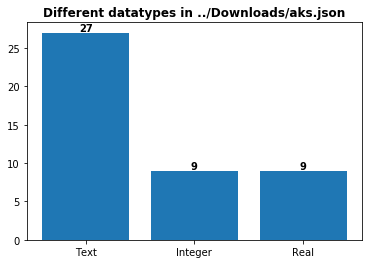

row 603
column 28
time_taken 3.560735


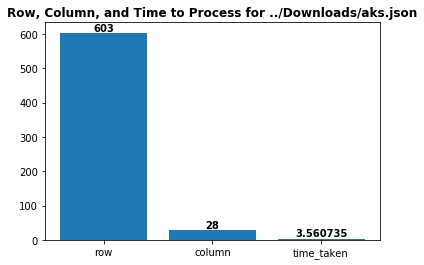

In [251]:
plot_graph_for_json("../Downloads/aks.json")

In [181]:


start_date = 'Sun Sep 16 16:05:15 +0000 2012'
end_date = 'Sun Sep 17 23:55:20 +0000 2012'


def __datetime(date_str):
    return datetime.strptime(date_str, '% %b %d %H:%M:%S +0000 %Y')

start = __datetime(data["start time"])
end = __datetime(data["end time"])

delta = end - start
print(delta)  # prints: 1 day, 7:50:05
print(delta.total_seconds())  # prints: 114605.0

NameError: name 'data' is not defined

In [ ]:
File not processed :  /user/hm74/NYCOpenData/aiww-p3af.tsv.gz
File not processed :  /user/hm74/NYCOpenData/3rfa-3xsf.tsv.gz
File not processed :  /user/hm74/NYCOpenData/a5td-mswe.tsv.gz
File not processed :  /user/hm74/NYCOpenData/2bnn-yakx.tsv.gz
File not processed :  /user/hm74/NYCOpenData/jz4z-kudi.tsv.gz
File not processed :  /user/hm74/NYCOpenData/52dp-yji6.tsv.gz
File not processed :  /user/hm74/NYCOpenData/43nn-pn8j.tsv.gz
File not processed :  /user/hm74/NYCOpenData/5fn4-dr26.tsv.gz
/user/hm74/NYCOpenData/wcmg-48ep.tsv.gz not processed
/user/hm74/NYCOpenData/yg5a-hytu.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/c284-tqph.tsv.gz
/user/hm74/NYCOpenData/pdpg-nn8i.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/2bnn-yakx.tsv.gz
File not processed :  /user/hm74/NYCOpenData/kiv2-tbus.tsv.gz
/user/hm74/NYCOpenData/fb26-34vu.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/kiv2-tbus.tsv.gz
File not processed :  /user/hm74/NYCOpenData/faiq-9dfq.tsv.gz
File not processed :  /user/hm74/NYCOpenData/s9d3-x4fz.tsv.gz
File not processed :  /user/hm74/NYCOpenData/jt7v-77mi.tsv.gz
File not processed :  /user/hm74/NYCOpenData/cspg-yi7g.tsv.gz
File not processed :  /user/hm74/NYCOpenData/vx8i-nprf.tsv.gz
File not processed :  /user/hm74/NYCOpenData/qgea-i56i.tsv.gz
File not processed :  /user/hm74/NYCOpenData/cspg-yi7g.tsv.gz
/user/hm74/NYCOpenData/qusa-igsv.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/ipu4-2q9a.tsv.gz
File not processed :  /user/hm74/NYCOpenData/a9md-ynri.tsv.gz
File not processed :  /user/hm74/NYCOpenData/mu46-p9is.tsv.gz
File not processed :  /user/hm74/NYCOpenData/3rfa-3xsf.tsv.gz
File not processed :  /user/hm74/NYCOpenData/h9gi-nx95.tsv.gz
File not processed :  /user/hm74/NYCOpenData/2bnn-yakx.tsv.gz
File not processed :  /user/hm74/NYCOpenData/hy4q-igkk.tsv.gz
File not processed :  /user/hm74/NYCOpenData/sxmw-f24h.tsv.gz
File not processed :  /user/hm74/NYCOpenData/sqcr-6mww.tsv.gz
/user/hm74/NYCOpenData/d3ge-anaz.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/2bmr-jdsv.tsv.gz
File not processed :  /user/hm74/NYCOpenData/pvqr-7yc4.tsv.gz
File not processed :  /user/hm74/NYCOpenData/bbs3-q5us.tsv.gz
File not processed :  /user/hm74/NYCOpenData/erm2-nwe9.tsv.gz
File not processed :  /user/hm74/NYCOpenData/jz4z-kudi.tsv.gz
File not processed :  /user/hm74/NYCOpenData/uzcy-9puk.tsv.gz
/user/hm74/NYCOpenData/8k4x-9mp5.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/6bgk-3dad.tsv.gz
File not processed :  /user/hm74/NYCOpenData/uzcy-9puk.tsv.gz
File not processed :  /user/hm74/NYCOpenData/bs8b-p36w.tsv.gz
File not processed :  /user/hm74/NYCOpenData/dm9a-ab7w.tsv.gz
File not processed :  /user/hm74/NYCOpenData/5uac-w243.tsv.gz
File not processed :  /user/hm74/NYCOpenData/h9gi-nx95.tsv.gz
File not processed :  /user/hm74/NYCOpenData/4pt5-3vv4.tsv.gz
File not processed :  /user/hm74/NYCOpenData/735p-zed8.tsv.gz
/user/hm74/NYCOpenData/ph7v-u5f3.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/3rfa-3xsf.tsv.gz
/user/hm74/NYCOpenData/4hiy-398i.tsv.gz not processed
File not processed :  /user/hm74/NYCOpenData/ydkf-mpxb.tsv.gz
File not processed :  /user/hm74/NYCOpenData/bty7-2jhb.tsv.gz
File not processed :  /user/hm74/NYCOpenData/sxmw-f24h.tsv.gz
File not processed :  /user/hm74/NYCOpenData/faiq-9dfq.tsv.gz
File not processed :  /user/hm74/NYCOpenData/erm2-nwe9.tsv.gz
File not processed :  /user/hm74/NYCOpenData/sxmw-f24h.tsv.gz
File not processed :  /user/hm74/NYCOpenData/jz4z-kudi.tsv.gz
File not processed :  /user/hm74/NYCOpenData/aiww-p3af.tsv.gz
File not processed :  /user/hm74/NYCOpenData/jt7v-77mi.tsv.gz
File not processed :  /user/hm74/NYCOpenData/pq5i-thsu.tsv.gz
File not processed :  /user/hm74/NYCOpenData/3rfa-3xsf.tsv.gz
File not processed :  /user/hm74/NYCOpenData/52dp-yji6.tsv.gz
File not processed :  /user/hm74/NYCOpenData/as69-ew8f.tsv.gz
File not processed :  /user/hm74/NYCOpenData/qu8g-sxqf.tsv.gz
File not processed :  /user/hm74/NYCOpenData/kiv2-tbus.tsv.gz

In [286]:
with open("./graph.json") as f:
    data = json.load(f)
print(data)

{'start time': '2019-12-04 17:51:26.637764', 'row_count': 2366, 'dataset_name': '3aka-ggej.tsv.gz', 'columns': [{'column_name': 'BOROUGH', 'number_non_empty_cells': 2366, 'number_empty_cells': 0, 'number_distinct_values': 8, 'frequent_values': ['K', 'X', 'Q', 'M', 'R'], 'dataTypes': [{'type': 'Text', 'count': 2366, 'longest_values': ['(0K-08* ONLY)"', '(MS CORE and ', '09-12 ONLY)"', 'K', 'M'], 'shortest_values': ['K', 'M', 'Q', 'R', 'X'], 'average_length': 1.0152155536770922}]}, {'column_name': 'GRADE LEVEL', 'number_non_empty_cells': 2365, 'number_empty_cells': 1, 'number_distinct_values': 15, 'frequent_values': ['09-12', 'MS Core', '0K-09', '04', '06'], 'dataTypes': [{'type': 'Integer', 'count': 815, 'max_val': 8, 'min_val': 1, 'mean': 4.515337423312883, 'std_dev': 2.280555097037737}, {'type': 'Text', 'count': 877, 'longest_values': ['SERVICE CATEGORY', 'CLASS SIZE', 'MS Core', '0K-09', 'None'], 'shortest_values': ['0K', 'None', '0K-09', 'MS Core', 'CLASS SIZE'], 'average_length': 6

In [309]:
def plot_graph_for_json(jsonfilename):
    with open(jsonfilename) as f:
        data = json.load(f)
    dtct = {}
    dtctnew = {}
    for col in data["columns"]:
        if col["column_name"] not in dtctnew.keys():
                dtctnew[col["column_name"]] = col["number_distinct_values"]
        for tp in col["dataTypes"]:
            dt = tp["type"]
            ct = tp["count"]
            dis = tp["number_distinct_values"]
            if dt not in dtct.keys():
                dtct[dt] = ct
            else:
                dtct[dt] += ct
    
    filename = jsonfilename.split('.')[0]
    plt.bar(range(len(dtct)), list(dtct.values()), align='center')
    st=0
    for x,y in dtct.items():
        x=st
        label = y
        plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,2),ha='center',weight='bold')
        st+=1
    plt.xticks(range(len(dtct)), list(dtct.keys()))
    plt.title("Different datatypes in 3aka-ggej.tsv.gz.json", weight="bold")
#     plt.title("Different datatypes in {}".format(jsonfilename), weight='bold')
    plt.show()

In [318]:
def plot_non_null_values(jsonfilename):
    with open(jsonfilename) as f:
        data = json.load(f)
    dtct = {}
    for col in data["columns"]:
        if col["column_name"] not in dtct.keys():
                dtct[col["column_name"]] = col["number_non_empty_cells"]
    
    filename = jsonfilename.split('.')[0]
    plt.bar(range(len(dtct)), list(dtct.values()), align='center')
    st=0
    for x,y in dtct.items():
        x=st
        label = y
        plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,2),ha='center',weight='bold')
        st+=1
    plt.xticks(range(len(dtct)), list(dtct.keys()))
    plt.title("Non null values in 3aka-ggej.tsv.gz.json", weight="bold")
#     plt.title("Different datatypes in {}".format(jsonfilename), weight='bold')
    plt.show()

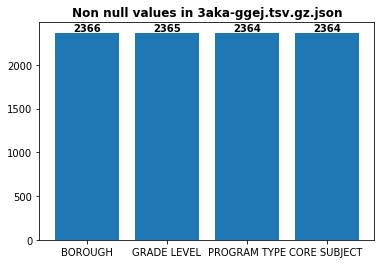

In [319]:
plot_non_null_values("./graph.json")

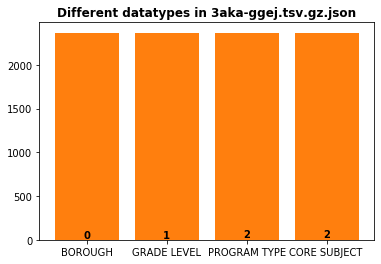

In [310]:
plot_total_values("./graph.json")

In [316]:
def plot_distinct_values(jsonfilename):
    with open(jsonfilename) as f:
        data = json.load(f)
    dtct = {}
    for col in data["columns"]:
        if col["column_name"] not in dtct.keys():
                dtct[col["column_name"]] = col["number_distinct_values"]
    
    filename = jsonfilename.split('.')[0]
    plt.bar(range(len(dtct)), list(dtct.values()), align='center')
    st=0
    for x,y in dtct.items():
        x=st
        label = y
        plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,2),ha='center',weight='bold')
        st+=1
    plt.xticks(range(len(dtct)), list(dtct.keys()))
    plt.title("Distinct values in 3aka-ggej.tsv.gz.json", weight="bold")
#     plt.title("Different datatypes in {}".format(jsonfilename), weight='bold')
    plt.show()

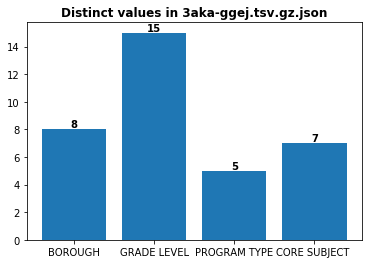

In [317]:
plot_distinct_values("./graph.json")

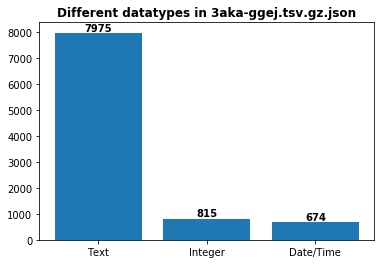

In [292]:
plot_graph_for_json("./graph.json")

In [293]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

def print_frequent_itemsets(jsonfilename):
    with open('2003_Campaign_Contributions.tsv.json') as f:
        data = json.load(f)
    ls = []
    for col in data["columns"]:
        l=[]
        for tp in col["dataTypes"]:
            dt = tp["type"]
            l.append(dt)
        ls.append(l)
        
    te = TransactionEncoder()
    te_ary = te.fit(ls).transform(ls)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    fi = apriori(df, min_support=0.1, use_colnames=True)
    fi['length'] = fi['itemsets'].apply(lambda x: len(x))
    for i in range(2,4):
        print(i,"frequent itemset")
        print("------------------------------------")
        tm = fi[ (fi['length'] == i) & (fi['support'] >= 0.1) ]
        if tm.size==0:
            print("No itemsets present")
        else:
            print(tm["itemsets"].to_string())
        print("------------------------------------\n")

In [294]:
print_frequent_itemsets("./graph.json")

2 frequent itemset
------------------------------------
3    (Date/Time, Text)
4      (Integer, Text)
------------------------------------

3 frequent itemset
------------------------------------
No itemsets present
------------------------------------

